# Kyler Ross

1) Start a new notebook and create the first cell as a markdown cell.  Write your name as a header, and a paragraph of text that describes the dataset, where you found it, and what the different columns represent, i.e. what are your variables.

This dataset is from NYC OpenData. The dataset details city employee Salary by Fiscal Year.

In [67]:
import requests

In [68]:
pay = requests.get('https://data.cityofnewyork.us/resource/4qxi-jgbe.json')

In [69]:
import pandas as pd
pay = pd.read_json(pay.text)
pay.head(20)

,agency_name,agency_start_date,base_salary,first_name,fiscal_year,last_name,leave_status_as_of_july_31,mid_init,ot_hours,pay_basis,regular_gross_paid,regular_hours,title_description,total_ot_paid,total_other_pay,work_location_borough
0,DISTRICT ATTORNEY-MANHATTAN,2003-07-14T00:00:00.000,47678.0,RAHASHEEM,2016,ABA'AHMID,ACTIVE,E,2.25,per Annum,47166.03,1830.00,COMMUNITY ASSOCIATE ...,57.28,0.00,MANHATTAN
1,DISTRICT ATTORNEY-MANHATTAN,1995-06-12T00:00:00.000,119959.0,MARGARET,2016,ABENSUR,ACTIVE,NaN,0.00,per Annum,119042.50,1831.00,ADMINISTRATIVE ACCOUNTANT ...,0.00,0.00,MANHATTAN
2,DISTRICT ATTORNEY-MANHATTAN,2011-10-11T00:00:00.000,39966.0,ANDREA,2016,ABOUNAOUM,ON LEAVE,L,1.00,per Annum,27452.62,1181.68,COMMUNITY ASSOCIATE ...,21.34,33.00,MANHATTAN
3,DISTRICT ATTORNEY-MANHATTAN,2014-12-01T00:00:00.000,116000.0,JONATHAN,2016,ABRAHAM,ACTIVE,J,0.00,per Annum,115104.57,1831.00,COMPUTER SYSTEMS MANAGER ...,0.00,0.00,MANHATTAN
4,DISTRICT ATTORNEY-MANHATTAN,2015-05-21T00:00:00.000,1.0,JOSEPH,2016,ABRAMS,CEASED,NaN,0.00,per Hour,3500.00,0.00,COLLEGE AIDE ...,0.00,0.00,MANHATTAN
5,DISTRICT ATTORNEY-MANHATTAN,2012-09-04T00:00:00.000,71500.0,JENNIFER,2016,ABREU,ACTIVE,NaN,0.00,per Annum,71967.34,1831.00,ASSISTANT DISTRICT ATTORNEY ...,0.00,0.00,MANHATTAN
6,DISTRICT ATTORNEY-MANHATTAN,2007-09-04T00:00:00.000,88000.0,JUAN,2016,ABREU,ACTIVE,D,0.00,per Annum,87614.01,1831.00,ASSISTANT DISTRICT ATTORNEY ...,0.00,750.00,MANHATTAN
7,DISTRICT ATTORNEY-MANHATTAN,2016-06-06T00:00:00.000,1.0,JENNIFER,2016,ACEVEDO,ACTIVE,NaN,0.00,per Hour,500.00,0.00,COLLEGE AIDE ...,0.00,0.00,MANHATTAN
8,DISTRICT ATTORNEY-MANHATTAN,2014-09-02T00:00:00.000,41000.0,MATTHEW,2016,ACOCELLA,CEASED,J,0.00,per Annum,9507.15,349.00,COMMUNITY ASSOCIATE ...,0.00,0.00,MANHATTAN
9,DISTRICT ATTORNEY-MANHATTAN,1978-05-31T00:00:00.000,66035.0,RITA,2016,ACOSTA,ACTIVE,E,0.00,per Annum,64357.12,1830.00,PRINCIPAL ADMINISTRATIVE ASSOCIATE,0.00,3824.72,MANHATTAN


2) Slice the data by column

In [70]:
base_salary = pay.iloc[:,2]
base_salary.describe()

count      1000.00000
mean      65980.47678
std       41442.51573
min           1.00000
25%       39991.50000
50%       58781.00000
75%       82500.00000
max      195000.00000
Name: base_salary, dtype: float64

3) Slice the data by row using both .loc and .iloc

In [71]:
pay1 = pay.loc[pay['regular_gross_paid'] > 175000]
pay2 = pay1.iloc[:, [3,5,2,13,12]]
pay2.head()

,first_name,last_name,base_salary,total_ot_paid,title_description
70,PATRICIA,BAILEY,178000.0,0.0,ASSISTANT DISTRICT ATTORNEY ...
83,MARY,BARNETT,175000.0,0.0,SPECIAL ASSISTANT TO DA ...
88,MARTHA,BASHFORD,185000.0,0.0,ASSISTANT DISTRICT ATTORNEY ...
208,PETER,CASOLARO,185000.0,0.0,ASSISTANT DISTRICT ATTORNEY ...
322,WILLIAM,DARROW JR,185000.0,0.0,ASSISTANT DISTRICT ATTORNEY ...


4) Use the .groupby method to create a grouped set of data

In [72]:
title = pay.groupby('title_description').mean()
gross_pay = title.sort_values(by=['regular_gross_paid'], ascending=False)
gross_pay['regular_gross_paid'] = gross_pay['regular_gross_paid'].map('${:,.2f}'.format)
gross_pay = gross_pay.drop(['base_salary', 'fiscal_year', 'ot_hours', 'regular_hours', 'total_ot_paid', 'total_other_pay'], axis=1)
gross_pay.head(10)

,regular_gross_paid
title_description,
SPECIAL ASSISTANT TO DA,"$179,579.32"
COMPUTER OPERATIONS MANAGER,"$154,890.90"
ADMINISTRATION PUBLIC RECORD OFFICER,"$141,463.06"
CARPENTER,"$140,657.53"
ADMINISTRATIVE CHIEF,"$140,624.09"
ADMINISTRATIVE EDUCATION ANALYST,"$129,016.85"
ADMINISTRATIVE ACCOUNTANT,"$127,020.17"
ADMINISTRATIVE PROJECT MANAGER,"$124,090.69"
ADMINISTRATIVE ARCHITECT,"$115,104.57"


In [73]:
gross_pay.head(10)

,regular_gross_paid
title_description,
SPECIAL ASSISTANT TO DA,"$179,579.32"
COMPUTER OPERATIONS MANAGER,"$154,890.90"
ADMINISTRATION PUBLIC RECORD OFFICER,"$141,463.06"
CARPENTER,"$140,657.53"
ADMINISTRATIVE CHIEF,"$140,624.09"
ADMINISTRATIVE EDUCATION ANALYST,"$129,016.85"
ADMINISTRATIVE ACCOUNTANT,"$127,020.17"
ADMINISTRATIVE PROJECT MANAGER,"$124,090.69"
ADMINISTRATIVE ARCHITECT,"$115,104.57"


5) Create the following visualizations use the Seaborn Tutorial for help (https://seaborn.pydata.org/tutorial/categorical.html Links to an external site.)  

a. distplot

b. boxplot

c. violin plot

d. bar plot

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
pay3 = pay.groupby('title_description').count()
pay3 = pay3.iloc[:,10]
pay3 = pay3.sort_values(ascending=False)
pay4 = pay3.iloc[0:10]
pay4

title_description
ASSISTANT DISTRICT ATTORNEY                                     337
COMMUNITY ASSOCIATE                                             321
COLLEGE AIDE                                                     86
COMMUNITY COORDINATOR                                            80
COMMUNITY ASSISTANT                                              23
REPORTER/ STENOGRAPHER                                           18
PRINCIPAL ACCOUNTANT INVESTIGATOR                                12
CITY CUSTODIAL ASSISTANT                                         11
CLERICAL ASSOCIATE                                               10
PRINCIPAL ADMINISTRATIVE ASSOCIATE                                7
Name: regular_gross_paid, dtype: int64

In [91]:
pay6 = pay.filter(['title_description','regular_gross_paid'], axis=1)
pay5 = pay6.merge(pay4.to_frame(), left_on='title_description', right_index=True)
pay5.head()

,title_description,regular_gross_paid_x,regular_gross_paid_y
0,COMMUNITY ASSOCIATE ...,47166.03,321
2,COMMUNITY ASSOCIATE ...,27452.62,321
8,COMMUNITY ASSOCIATE ...,9507.15,321
10,COMMUNITY ASSOCIATE ...,6073.13,321
11,COMMUNITY ASSOCIATE ...,39895.79,321


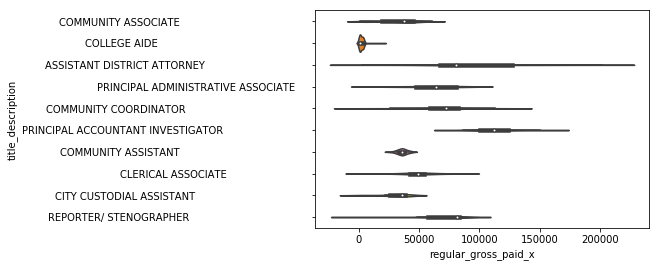

In [130]:
sns.violinplot(x="regular_gross_paid_x", y="title_description", data=pay5);

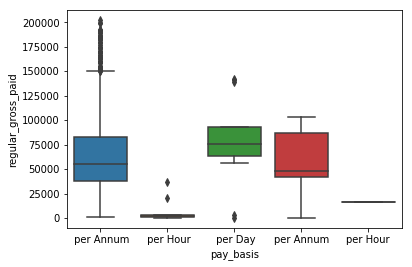

In [93]:
sns.boxplot(x="pay_basis", y="regular_gross_paid", data=pay);

In [122]:
start = pay.loc[:,('agency_start_date', 'regular_gross_paid')]
start['start_year'] = start['agency_start_date'].astype(str).str[0:4]
start['start_year'] = start['start_year'].astype(int)
start.head()

,agency_start_date,regular_gross_paid,start_year
0,2003-07-14T00:00:00.000,47166.03,2003
1,1995-06-12T00:00:00.000,119042.50,1995
2,2011-10-11T00:00:00.000,27452.62,2011
3,2014-12-01T00:00:00.000,115104.57,2014
4,2015-05-21T00:00:00.000,3500.00,2015


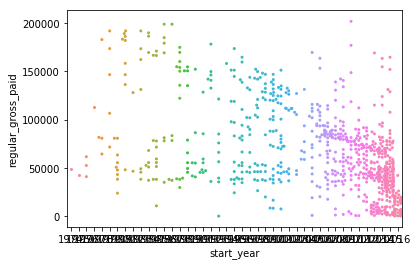

In [124]:
sns.swarmplot(x="start_year", y="regular_gross_paid", data=start, size=3);

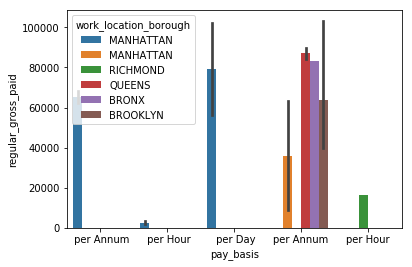

In [131]:
sns.barplot(x="pay_basis", y="regular_gross_paid", hue="work_location_borough", data=pay);